In [1]:
import sys, os
import numpy as np

sys.path.append(os.path.join(os.path.pardir, 'python'))
from tcg_slb.phasediagram.equilibrate import EquilibratePD, EquilibratePDGrid, PDEquilibrateGridDiagnostics
from tcg_slb.base import *
from tcg_slb.info import additional_phase_abbrevs

/Users/cwilson/Work/thermoengine/tcg_model_integration/python3.9/lib/python3.9/site-packages/numdifftools/multicomplex.py:35: DeprecationWarning: `finfo.machar` is deprecated (NumPy 1.22)
  _TINY = np.finfo(float).machar.tiny


In [2]:
from thermoengine.equilibrate import PhaseLibrary
import thermoengine as thermo

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Setup Equilibrate

In [3]:
pv = repr(sys.version_info.major)+'.'+repr(sys.version_info.minor)
sys.path.append(os.path.join(os.path.pardir, 'database', 'install', 'tcg_slb_database', 'lib', 'python'+pv, 'site-packages'))

import py_tcg_slb_database as pslb
db = thermo.model.Database.from_thermocodegen(pslb)
all_phases = db.get_all_phases()
std_phases = [ph for ph in all_phases if ph.abbrev not in additional_phase_abbrevs]
phase_library = PhaseLibrary(std_phases)

Solution phase code generated by the coder module does not yet provide information on solution species. Species are proxied by components.
Solution phase code generated by the coder module does not yet provide information on species properties. Species are proxied by components.
Solution phase code generated by the coder module does not yet provide information on solution species. Species are proxied by components.
Solution phase code generated by the coder module does not yet provide information on species properties. Species are proxied by components.
Solution phase code generated by the coder module does not yet provide information on solution species. Species are proxied by components.
Solution phase code generated by the coder module does not yet provide information on species properties. Species are proxied by components.
Solution phase code generated by the coder module does not yet provide information on solution species. Species are proxied by components.
Solution phase code g

In [4]:
eq = EquilibratePD(phase_library)

#### Temperature, pressure, composition

In [5]:
# initial temperature, pressure and phase volume fraction
Ti = 1673.                # Kelvin
pi = GPa2Bar(30.)         # bars
comp = thermo.OxideMolComp(SiO2=1, MgO=1, FeO=1)

### Solve the minimum Gibbs energy

In [6]:
eq.solve(Ti,pi,comp)

In [7]:
eq.final_rho(), eq.final_phases(), eq.assemblage.sample_endmem_comps

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cwilson/Work/thermoengine/tcg_model_integration/python3.9/lib/python3.9/site-packages/thermoengine/samples.py:612: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([samp.X for samp in self.samples])


(48.74349716207542,
 (['Magnesiowuestite_slb_ph', 'Perovskite_slb_ph', 'Stishovite_slb_em'],
  ['mw', 'pv', 'st']),
 array([array([1.]), array([0.4, 0.6]), array([0.85, 0.15, 0.  ])],
       dtype=object))

## Solve for a grid

In [8]:
reload = False

import pickle

filename = os.path.join('output', 'equilibrate_tcg_mgfesio4_lowp.pickle')

if reload:
    pfile = open(filename, 'rb')
    equilgrid = pickle.load(pfile)
    pfile.close()
else:
    p_n = 60
    p_min = 0.0 + 0.5*30/p_n
    p_max = 30.0 - 0.5*30/p_n
    p_range = np.linspace(p_min, p_max, p_n)
    x_n = 50
    x_min = 0.5/x_n
    x_max = 1. - 0.5/x_n
    x_range = np.linspace(x_min, x_max, x_n)
    x0 = {'SiO2':1, 'MgO':2}
    x1 = {'SiO2':1, 'FeO':2}
    equilgrid = EquilibratePDGrid()
    equilgrid.solve(phase_library, ['X', 'p'], x_range, p_range, **{'T':Ti, 'X0':x0, 'X1':x1})

In [9]:
save = True

if not reload and save:
        pfile = open(filename, 'wb')
        pickle.dump(equilgrid, pfile)
        pfile.close()

In [10]:
import matplotlib.pyplot as plt

def decorate(pdrgd):
    def new_setup_axes(self,axi):
        img = plt.imread("figures/slb_figure10a.png")
        ip = axi.imshow(img)
        axi.axis('off')
        ax = axi.inset_axes([0.002,0.004,0.995,0.996])
        ax.patch.set_alpha(0.0)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 30.0])
        ax.set_ylabel("Pressure (GPa)")
        ax.set_xlabel("Initial $X_{Mg_2SiO_4}$")
        ax.invert_xaxis()
        return ax
    
    #replace the display with newdisplay
    pdrgd.setup_axes = new_setup_axes
    
    #return the modified student 
    return pdrgd

equildiag = decorate(PDEquilibrateGridDiagnostics)(phase_library,equilgrid)

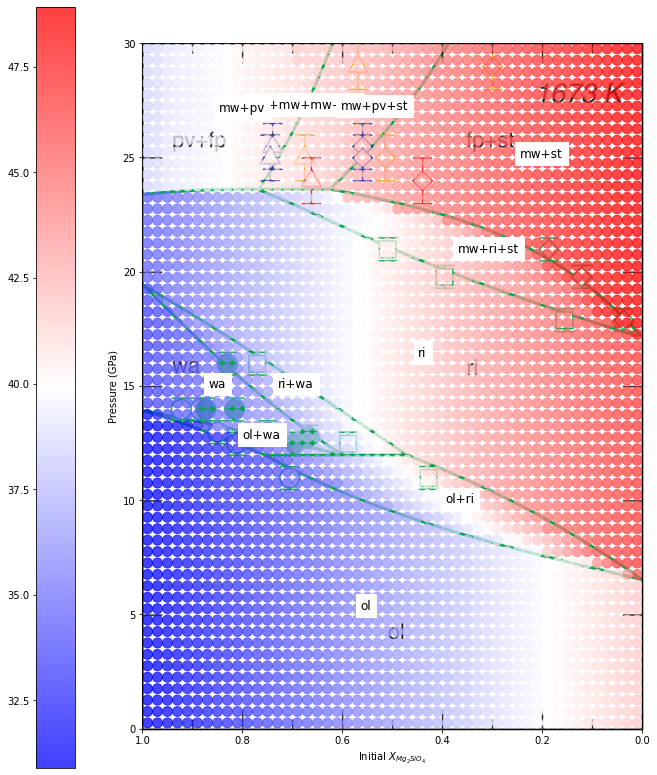

In [11]:
equildiag.plot_rho()

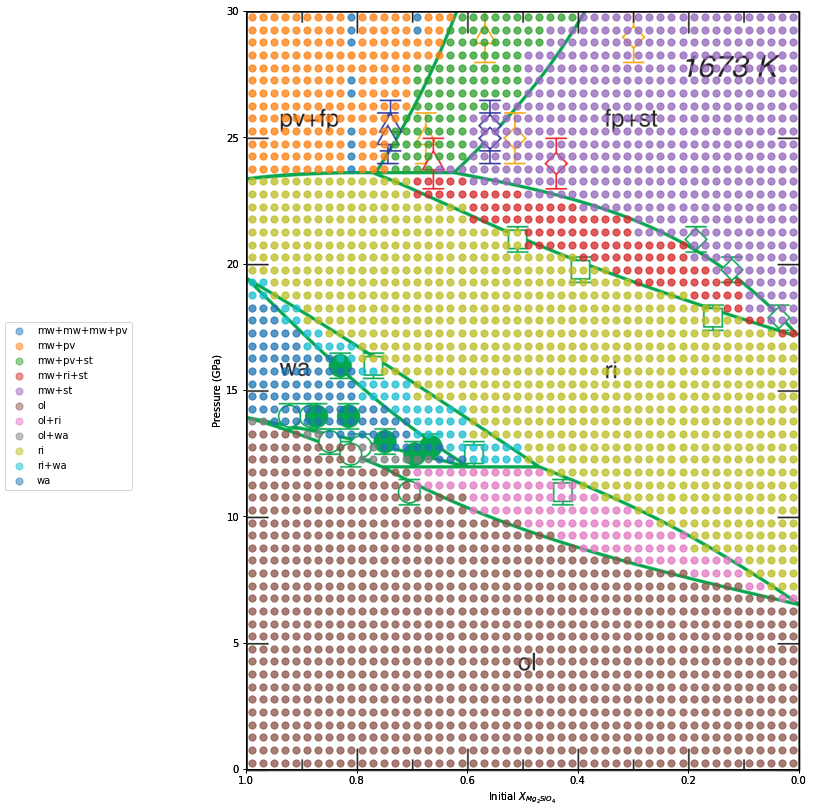

In [12]:
#%matplotlib widget
equildiag.plot_phases()

In [13]:
i=54; j=40
equilgrid.emcompgrid[i][j], equilgrid.phnamegrid[i][j], equilgrid.amountgrid[i][j], equilgrid.pgrid[i][j], equilgrid.Tgrid[i][j]

(array([array([0.7, 0.3]), array([0.7, 0.3]), array([0.7, 0.3]),
        array([0.92, 0.08, 0.  ])], dtype=object),
 array(['mw', 'mw', 'mw', 'pv'], dtype='<U2'),
 array([0.14285714, 0.14285714, 0.28571428, 0.71428571]),
 27.25,
 1673.0)

In [14]:
i=55; j=40
equilgrid.emcompgrid[i][j], equilgrid.phnamegrid[i][j], equilgrid.amountgrid[i][j], equilgrid.pgrid[i][j], equilgrid.Tgrid[i][j]

(array([array([0.7, 0.3]), array([0.92, 0.08, 0.  ])], dtype=object),
 array(['mw', 'pv'], dtype='<U2'),
 array([0.28571428, 0.71428571]),
 27.75,
 1673.0)

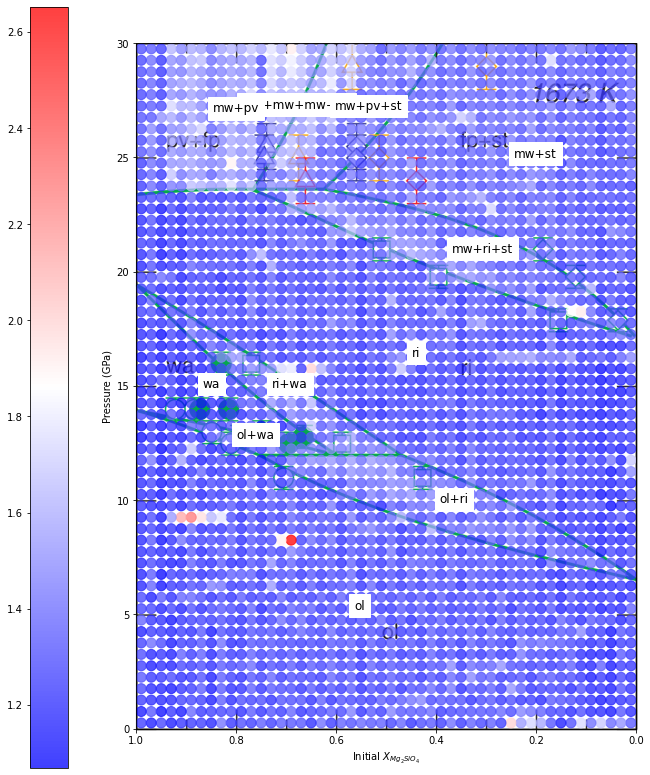

In [15]:
%matplotlib inline
equildiag.plot_stime()